# 3-2. Channel이 하나일 때 1-Layer의 Convolution 연산

## CNN이란?

CNN(Convolution Neural Network)의 구조는 아래와 같습니다.

<img src ="https://drive.google.com/uc?id=17bwqh9JCIpe3ucsKPVYlQu6r3ZK0ItwC">

https://developersbreach.com/convolution-neural-network-deep-learning/

## Convolution 연산이란?

Convolution 연산은 Input에 kernel을 over-riding하여 겹쳐지는 숫자를 곱하여 그 값을 더하는 것입니다. stride를 1로 지정하여 Convolution 연산을 반복하면 feature map이 나옵니다.

 - 7x7 Input, 3x3 kernel, stride 1일 때 convolution 연산을 하면 어떤 크기의 feature map이 나오나요? => 5*5

- 7x7 image의 데이터에 5x5의 필터로 convolution 연산을 했을 때 feature map의 사이즈는 어떻게 되나요? (stride는 1) =>  3*3

-  7x7 image의 데이터에 5x5의 필터로 convolution 연산을 했을 때 feature map의 사이즈는 어떻게 되나요?? (stride는 2) => 2*2

-  9x9 image의 데이터를 3x3의 필터로 convolution 연산을 두 번 했을 때, 연산의 결과로 나온 최종 feature map의 사이즈는 어떻게 되나요? (stride는 처음에는 2, 두번째에는 1) => 2*2

# 3-3. Filter를 이해하기

## Hand-Crafted Feature

딥러닝을 컴퓨터 비전에 사용하기 전에도 사람들이 직접 찾아낸 Hand-Crafted filter가 있었습니다. 이를 찾아낸 특징을 Hand-Crafted Feature이라고 합니다.



<img src="https://drive.google.com/uc?id=1GDJ4wc2aPjnBfZCfY5JUSEhk4TDlF7ZF">


https://vision0814.tistory.com/73



많은 노력을 들여 filter를 찾으려고 했던 이유는 filter를 많이 확보하는 것이 컴퓨터 비전의 성능을 높이는 핵심 경쟁력이기 때문입니다.

Hand-Crafted filter의 한계점은 사람이 직접 많은 노력을 들여 찾아내야 한다는 것이었습니다. 이를 대체한 것이 Deep Learning이고, Convolution 연산입니다.


<img src = "https://drive.google.com/uc?id=16GevCPaJhR4KeUw4khBkLfPV6JivKtu4">


https://www.inkjetwholesale.com.au/blog/wp-content/uploads/2016/07/instagram-for-your-business-filters.jpg

## 코드로 Filter와 Convolution 연산 이해하기

이미지에 숨겨져 있는 패턴을 찾아내는 '패턴 추출기'를 만들 수 있을까요? 이미지 분석의 경우에는 'filter'라는 이름의 패턴 추출기를 사용합니다.

filter와 convolution 연산 코드를 직접 실행시키면서 filter와 convolution 연산에 대해 이해해봅시다.
아래의 귀여운 고양이 사진에 filter를 적용해볼 거예요. 😸

filter를 이미지에 적용해 보면서 아래의 질문에 대한 답을 생각해 보세요.

* 원본 이미지에서 숨겨져 있는 패턴을 어떻게 찾을 수 있을까?
* 원본 이미지의 패턴 형성의 구조를 보존하면서 이미지를 어떻게 분석할 수 있을까?

<img src ="https://drive.google.com/uc?id=1f-P1o9gAPhc5_9RGIGkAhW_gJpdZ85eL">


먼저 이번에 사용할 라이브러리와 고양이 사진을 불러옵시다.
원본 RGB 이미지에는 R, G, B 3개의 채널이 있기 때문에 간단한 실습을 위해 rgb2gray 함수로 이미지를 흑백으로 변환합니다.


In [1]:
# 필요한 모듈 불러오기
import numpy as np
from scipy.signal import convolve2d # 2D convolution 연산
from skimage.io import imread, imshow # 데이터를 이미지로 보여주기
from skimage.color import rgb2gray # RGB 채널값을 가진 이미지 데이터를, 흑백 이미지의 데이터로 변환하기

In [5]:
cat = rgb2gray(imread('/content/drive/MyDrive/data/cat.jpg')) # read image

흑백 고양이 사진은 3,266개의 행과 4,899개의 열로 이루어진 1-channel 이미지입니다.
행렬 안에는 0과 1 사이의 값으로 정규화된 픽셀 값이 들어 있습니다.

In [6]:
cat.shape

(533, 800)

In [7]:
cat

array([[0.85855569, 0.84679098, 0.85855569, ..., 0.10155294, 0.09763137,
        0.09763137],
       [0.86247725, 0.85071255, 0.86639882, ..., 0.0937098 , 0.08978824,
        0.08978824],
       [0.82718314, 0.81541843, 0.83502627, ..., 0.08586667, 0.08586667,
        0.08586667],
       ...,
       [0.68252549, 0.67860392, 0.67860392, ..., 0.88600667, 0.88600667,
        0.8820851 ],
       [0.68252549, 0.67468235, 0.67860392, ..., 0.8820851 , 0.8820851 ,
        0.8820851 ],
       [0.67860392, 0.67076078, 0.67468235, ..., 0.87424196, 0.87816353,
        0.8820851 ]])

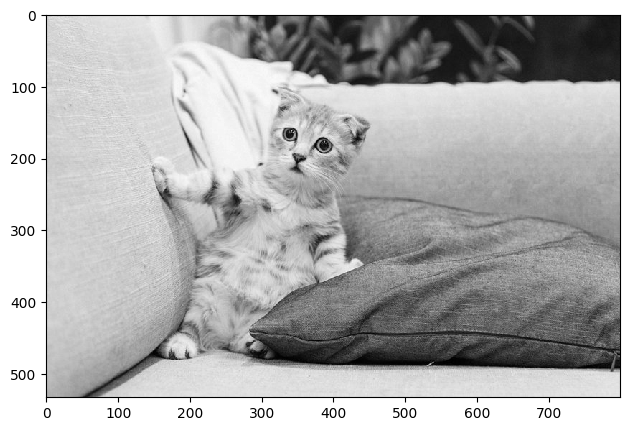

In [8]:
imshow(cat)

이미지를 분석할 때, 이미지에 숨겨져 있는 패턴을 찾아내는 '패턴 추출기'를 만들 수 있을까요? 이미지 분석의 경우에는 filter라는 이름의 패턴 추출기를 사용합니다.

filter를 고양이 사진에 적용해 봅시다. 먼저 고양이 사진에 적용할 대표적인 세 가지 filter를 정의합니다.
순서대로 Edge Detection, Sharpen, Gaussian Blur filter입니다.

filter는 그냥 봤을 때는 그저 숫자 덩어리이에요. 하지만 filter를 이용해서 convolution 연산을 하게 되면, 이미지 안에 숨겨져 있던 패턴이 드러나게 됩니다. 따라서 이미지 분석에서 중요한 것은 이미지 내에 숨겨진 다양하고 복잡한 패턴을 추출해줄 수 있는 다양한 filter를 만들어 내는 것입니다.

In [9]:
# Edge Detection
edge = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])
# Sharpen
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
# Gaussian Blur
blur = (1 / 16.0) * np.array([[1., 2., 1.],
                                 [2., 4., 2.],
                                 [1., 2., 1.]])

각각의 filter를 고양이 이미지에 적용해 봅시다.

### Edge Detection


In [10]:
edge_im = convolve2d(cat, edge, 'valid')

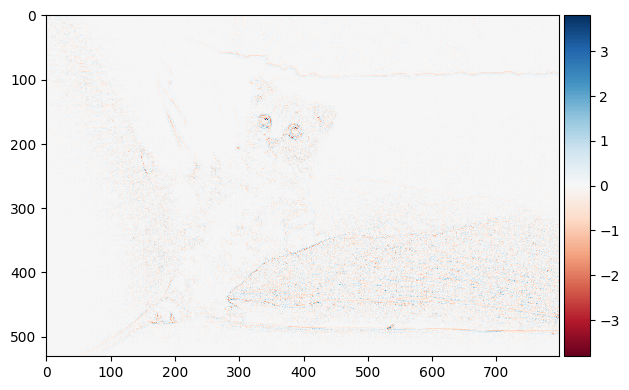

In [11]:
imshow(edge_im)

### Sharpen

In [12]:
sharp_im = convolve2d(cat, sharpen, 'valid')

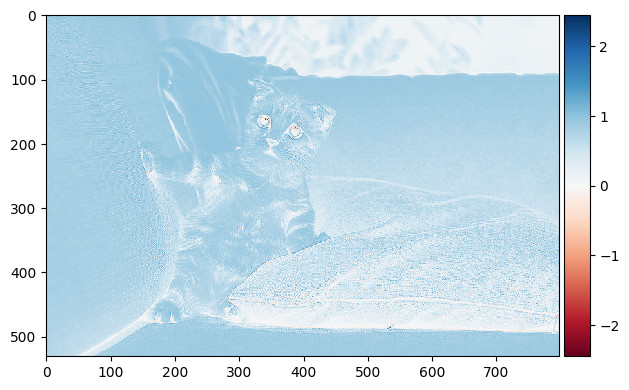

In [13]:
imshow(sharp_im)

### Gaussian Blur

In [15]:
blur_im = convolve2d(cat, blur, 'valid')

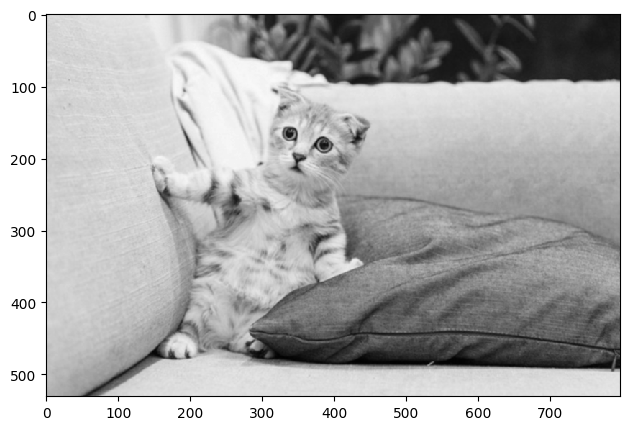

In [16]:
imshow(blur_im)

제시된 이미지 외에도 다양한 이미지를 통해서 3개의 필터가 어떤 역할을 하는지 확인해 보세요.

Q. Edge Detection, Sharpen, Gaussian Blur filter의 역할은 무엇인가요? 다양한 이미지를 통해 알아낸 사실을 적어보세요.

# 3-4. Channel이 하나일 때 2개 이상의 Layer에서 Convolution 연산 (Padding)

### Convolution 연산을 계속하게 되면

Convolution 연산을 다시 살펴 봅시다.


<img src = "https://drive.google.com/uc?id=1j4i29tyQviBJwz5rGb69dsmEMw4tIWpi">


https://www.freecodecamp.org/news/content/images/2019/07/convSobel.gif



|input size|kernel size|output size|
|---|---|---|
|7x7|3x3|5x5|
|5x5|3x3|3x3|
|3x3|3x3|1x1|


표에서 볼 수 있듯 Convolution 연산을 계속하게 되면 output의 크기가 줄어들기 때문에 최대 3개의 layer만 쌓을 수 있습니다.

하지만 hidden layer의 개수가 늘어날수록 다양하고 복잡한 패턴을 찾을 수 있습니다. 그럼 어떻게 더 많은 layer를 쌓을 수 있을까요?

<img src="https://drive.google.com/uc?id=1aJI0Fvqvw3OnKjcWrn0KDrMmGy3U3L1E">


https://www.researchgate.net/figure/The-receptive-field-of-each-convolution-layer-with-a-3-3-kernel-The-green-area-marks_fig4_316950618



### Padding!

더 많은 layer를 쌓을 수 있는 해결책은 padding을 사용하는 것입니다.

padding은 Filter를 적용하여 Conv 연산을 수행할 때 출력 Feature Map이 입력 Feature Map 대비, 계속적으로 작아지는 것을 막기 위해 적용합니다. Filter을 적용하기 전에 보존하려는 Feature map 크기에 맞게 입력 Feature Map의 좌우 끝과 상하 끝에 각각 열과 행을 추가한 뒤, 0 값을 채워 입력 Feature map 사이즈를 증가시킵니다.

이런 식으로 padding을 적용하면 깊은 layer를 쌓을 수 있습니다.

convolution 연산을 적용시킬 때 stride과 padding의 수와 같은 hyperparameter를 생각해 보는 것이 좋습니다. 이에 대한 내용은 4번 노드에서 다룹니다.

<img src="https://drive.google.com/uc?id=13BMpbZ4UzTg2KCSotC77AvmtnPuz9tln">
https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2